In [316]:
import pandas as pd

In [317]:
credit_data = pd.read_csv("german credit data unclean.csv")

In [318]:
credit_data[0:12]

,check_account_status,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,percent_disposable_income,gender_marriage,other_debtors,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,A11,6,A34,A43,1169.0,A65,A75,4,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951.0,A61,A73,2,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096.0,A61,A74,2,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882.0,A61,A74,2,A93,A103,...,A122,NaN,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870.0,A61,A73,3,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1
5,A14,36,A32,A46,9055.0,A65,A73,2,A93,A101,...,A124,35.0,A143,A153,1,A172,2,A192,A201,0
6,A14,24,A32,A42,2835.0,A63,A75,3,A93,A101,...,A122,53.0,A143,A152,1,A173,1,A191,A201,0
7,A12,36,A32,A41,6948.0,A61,A73,2,A93,A101,...,A123,35.0,A143,A151,1,A174,1,A192,A201,0
8,A14,12,A32,A43,3059.0,A64,A74,2,A91,A101,...,A121,61.0,A143,A152,1,A172,1,A191,A201,0
9,A12,30,A34,A40,5234.0,A61,A71,4,A94,A101,...,A123,28.0,A143,A152,2,A174,1,A191,A201,1


In [319]:
import pandas as pd 
import numpy as np
print(credit_data.isnull())

     check_account_status  duration  credit_history  purpose  credit_amount  \
0                   False     False           False    False          False   
1                   False     False           False    False          False   
2                   False     False           False    False          False   
3                   False     False           False    False          False   
4                   False     False           False    False          False   
..                    ...       ...             ...      ...            ...   
995                 False     False           False    False          False   
996                 False     False           False    False          False   
997                 False     False           False    False          False   
998                 False     False           False    False          False   
999                 False     False           False    False          False   

     savings_account  employment_duration  percent_

In [320]:
print(credit_data.isnull().sum())

check_account_status          0
duration                      0
credit_history                0
purpose                       0
credit_amount                13
savings_account               0
employment_duration           0
percent_disposable_income     0
gender_marriage               0
other_debtors                 0
recident_since                0
property                      0
age                          12
other_plans                   0
housing                       0
num_credits                   0
job                           0
dependents                    0
telephone                     0
foreign_worker                0
default                       0
dtype: int64


In [321]:
print(credit_data.isnull().sum().sum())

25


In [322]:
import missingno as msno

<AxesSubplot: >

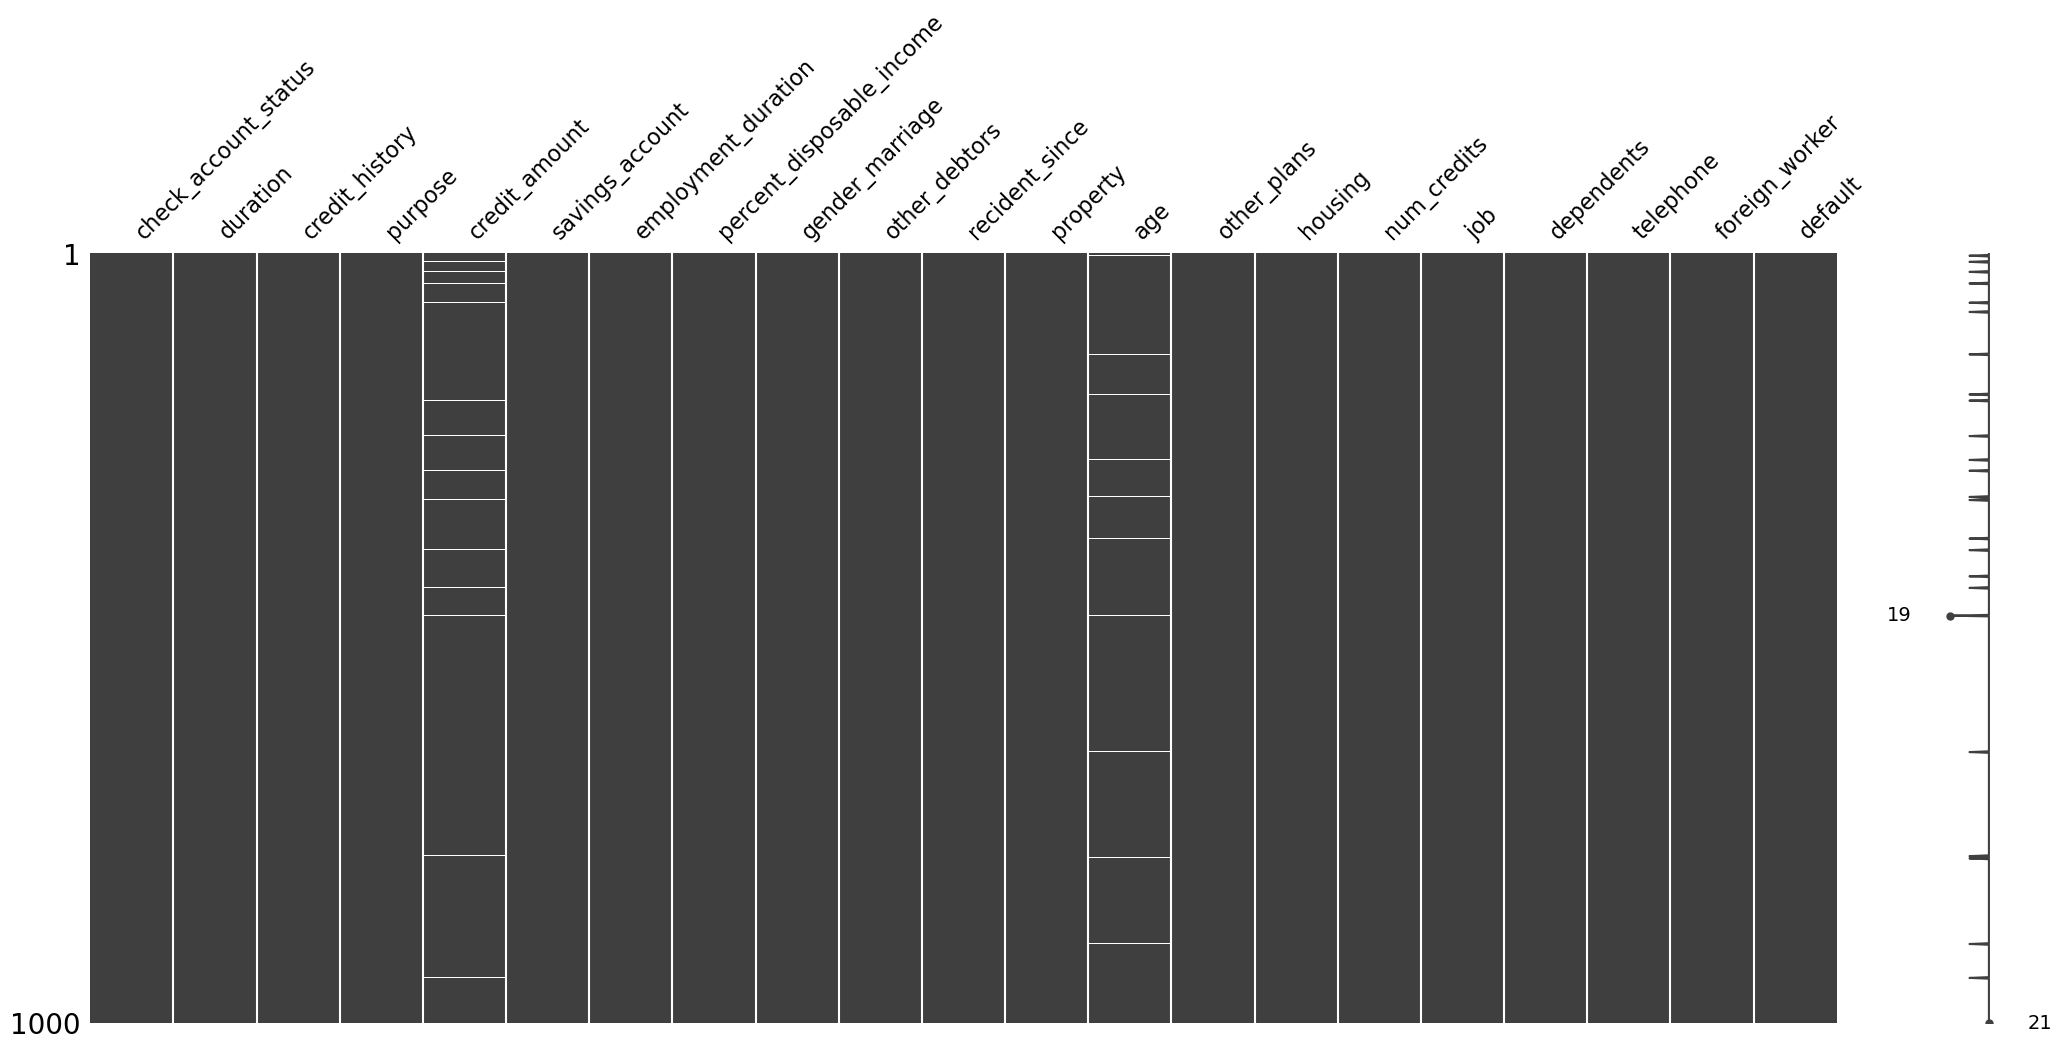

In [323]:
msno.matrix(credit_data)

<AxesSubplot: >

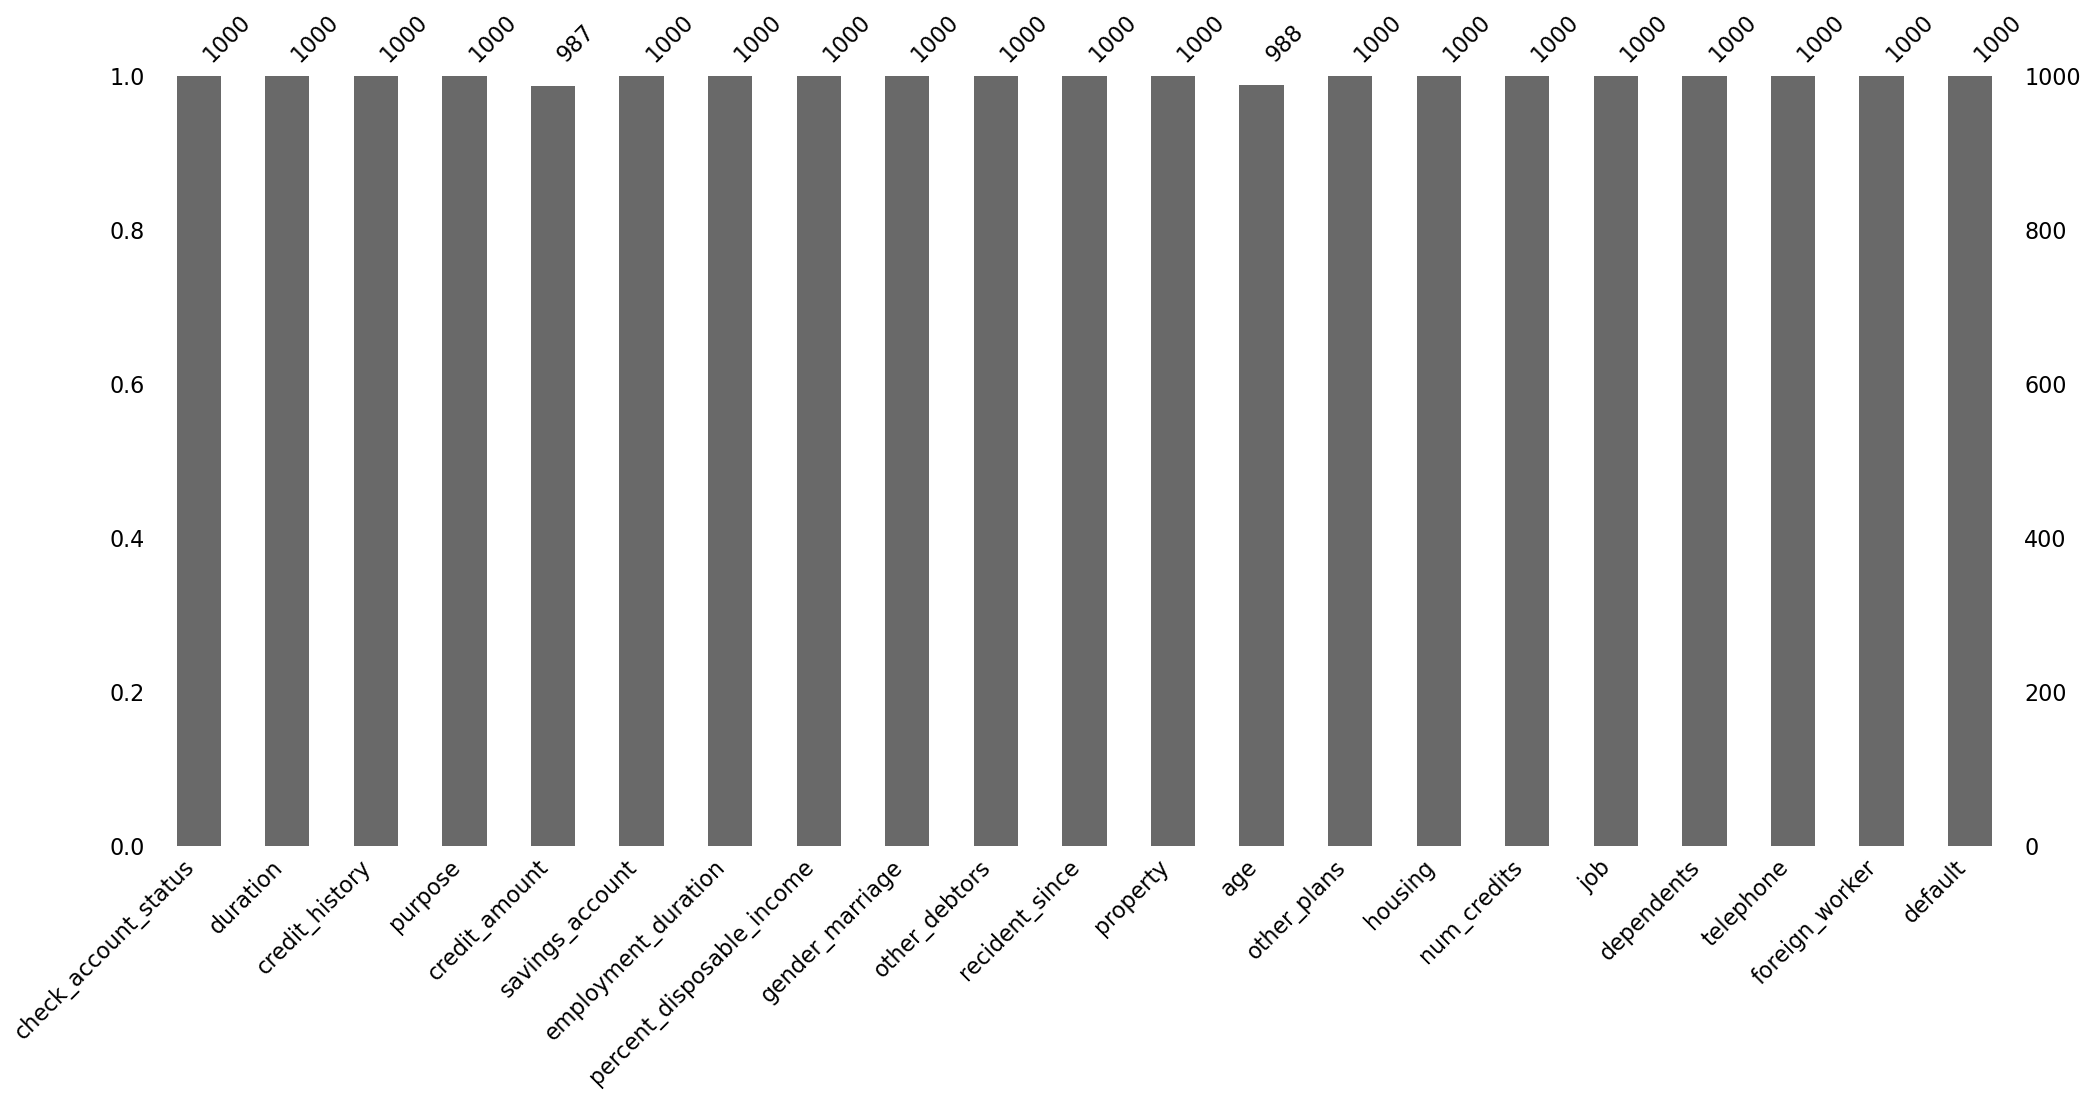

In [324]:
msno.bar(credit_data)

In [325]:
credit_data = credit_data.dropna(subset=['credit_amount'])
credit_data['age'].fillna(credit_data['age'].mean(), inplace=True)

In [326]:
print(credit_data.isnull().sum())

check_account_status         0
duration                     0
credit_history               0
purpose                      0
credit_amount                0
savings_account              0
employment_duration          0
percent_disposable_income    0
gender_marriage              0
other_debtors                0
recident_since               0
property                     0
age                          0
other_plans                  0
housing                      0
num_credits                  0
job                          0
dependents                   0
telephone                    0
foreign_worker               0
default                      0
dtype: int64


In [327]:
one_hot_check_acc_stat = pd.get_dummies(credit_data['check_account_status'], prefix='ch_ac_st') 
print( one_hot_check_acc_stat[0:5])

   ch_ac_st_A11  ch_ac_st_A12  ch_ac_st_A13  ch_ac_st_A14
0             1             0             0             0
1             0             1             0             0
2             0             0             0             1
3             1             0             0             0
4             1             0             0             0


In [328]:
credit_data.drop('check_account_status', axis=1, inplace = True)

In [329]:
credit_data = one_hot_check_acc_stat.join(credit_data)

In [330]:
credit_data[0:5]

,ch_ac_st_A11,ch_ac_st_A12,ch_ac_st_A13,ch_ac_st_A14,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,1,0,0,0,6,A34,A43,1169.0,A65,A75,...,A121,67.000000,A143,A152,2,A173,1,A192,A201,0
1,0,1,0,0,48,A32,A43,5951.0,A61,A73,...,A121,22.000000,A143,A152,1,A173,1,A191,A201,1
2,0,0,0,1,12,A34,A46,2096.0,A61,A74,...,A121,49.000000,A143,A152,1,A172,2,A191,A201,0
3,1,0,0,0,42,A32,A42,7882.0,A61,A74,...,A122,35.580943,A143,A153,1,A173,2,A191,A201,0
4,1,0,0,0,24,A33,A40,4870.0,A61,A73,...,A124,53.000000,A143,A153,2,A173,2,A191,A201,1


In [331]:
one_hot_credit_hist = pd.get_dummies(credit_data['credit_history'], prefix='cr_hist') 
credit_data.drop('credit_history', axis=1, inplace=True)
credit_data = one_hot_credit_hist.join(credit_data)
credit_data[0:5]

,cr_hist_A30,cr_hist_A31,cr_hist_A32,cr_hist_A33,cr_hist_A34,ch_ac_st_A11,ch_ac_st_A12,ch_ac_st_A13,ch_ac_st_A14,duration,...,property,age,other_plans,housing,num_credits,job,dependents,telephone,foreign_worker,default
0,0,0,0,0,1,1,0,0,0,6,...,A121,67.000000,A143,A152,2,A173,1,A192,A201,0
1,0,0,1,0,0,0,1,0,0,48,...,A121,22.000000,A143,A152,1,A173,1,A191,A201,1
2,0,0,0,0,1,0,0,0,1,12,...,A121,49.000000,A143,A152,1,A172,2,A191,A201,0
3,0,0,1,0,0,1,0,0,0,42,...,A122,35.580943,A143,A153,1,A173,2,A191,A201,0
4,0,0,0,1,0,1,0,0,0,24,...,A124,53.000000,A143,A153,2,A173,2,A191,A201,1


In [332]:
#purpose ...
column_name = 'purpose'
one_hot = pd.get_dummies(credit_data[column_name], prefix='purp') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#savings_acccount ..
column_name = 'savings_account'
one_hot = pd.get_dummies(credit_data[column_name], prefix='sav_acc') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#employment_duration
column_name = 'employment_duration'
one_hot = pd.get_dummies(credit_data[column_name], prefix='emp_dur') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#gender_marriage
column_name = 'gender_marriage'
one_hot = pd.get_dummies(credit_data[column_name], prefix='gend_mar') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#other_debtors
column_name = 'other_debtors'
one_hot = pd.get_dummies(credit_data[column_name], prefix='other_deb') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#property
column_name = 'property'
one_hot = pd.get_dummies(credit_data[column_name], prefix='prop') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#other_plans
column_name = 'other_plans'
one_hot = pd.get_dummies(credit_data[column_name], prefix='plans') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#housing
column_name = 'housing'
one_hot = pd.get_dummies(credit_data[column_name], prefix='house') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#job
column_name = 'job'
one_hot = pd.get_dummies(credit_data[column_name], prefix='job') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#telephone
column_name = 'telephone'
one_hot = pd.get_dummies(credit_data[column_name], prefix='tel') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)
#foreign_worker
column_name = 'foreign_worker'
one_hot = pd.get_dummies(credit_data[column_name], prefix='fw') 
credit_data.drop(column_name, axis=1, inplace=True) 
credit_data=one_hot.join(credit_data)


In [333]:
credit_data[0:12]

,fw_A201,fw_A202,tel_A191,tel_A192,job_A171,job_A172,job_A173,job_A174,house_A151,house_A152,...,ch_ac_st_A13,ch_ac_st_A14,duration,credit_amount,percent_disposable_income,recident_since,age,num_credits,dependents,default
0,1,0,0,1,0,0,1,0,0,1,...,0,0,6,1169.0,4,4,67.000000,2,1,0
1,1,0,1,0,0,0,1,0,0,1,...,0,0,48,5951.0,2,2,22.000000,1,1,1
2,1,0,1,0,0,1,0,0,0,1,...,0,1,12,2096.0,2,3,49.000000,1,2,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,42,7882.0,2,4,35.580943,1,2,0
4,1,0,1,0,0,0,1,0,0,0,...,0,0,24,4870.0,3,4,53.000000,2,2,1
5,1,0,0,1,0,1,0,0,0,0,...,0,1,36,9055.0,2,4,35.000000,1,2,0
6,1,0,1,0,0,0,1,0,0,1,...,0,1,24,2835.0,3,4,53.000000,1,1,0
7,1,0,0,1,0,0,0,1,1,0,...,0,0,36,6948.0,2,2,35.000000,1,1,0
8,1,0,1,0,0,1,0,0,0,1,...,0,1,12,3059.0,2,4,61.000000,1,1,0
9,1,0,1,0,0,0,0,1,0,1,...,0,0,30,5234.0,4,2,28.000000,2,1,1


In [334]:
from sklearn.linear_model import LogisticRegression

In [335]:
X = credit_data.loc[:,'fw_A201':'dependents'] 
Y = credit_data['default']

In [336]:
logModel = LogisticRegression(solver='liblinear')

In [337]:
logModel = logModel.fit(X,Y)

In [338]:
print(logModel.score(X,Y))

0.7852077001013171


In [339]:
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [341]:
logModel = logModel.fit(X_train,y_train)

In [342]:
predictions = logModel.predict(X_test)

In [343]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [344]:
print(logModel.score(X_test,y_test))

0.7676767676767676


In [345]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[123  21]
 [ 25  29]]


In [346]:
print(logModel.intercept_[0])
print(*logModel.coef_[0], sep='\n')

-0.551587521113384
0.26014604013132275
-0.8117335612447093
-0.17064355008958762
-0.38094397102384764
-0.13637531585890603
-0.09028047546095692
-0.04949335216132841
-0.2754383776322524
0.05884259431655274
-0.3075030029652235
-0.3029271124647537
-0.05842894398799946
0.05210597257220726
-0.5452645496976235
-0.4499588940981209
-0.10710572214387101
-0.05684017177648268
0.06231726690504814
-0.08539027842140974
0.3953165835518886
-0.8615138262438677
-0.04620803158848472
-0.036774600773474525
-0.5034179617668043
0.03481307301533109
0.15762777174690373
0.053940838084196384
-0.1164037537828642
-0.5666327410721719
-0.08011963608948734
0.4830070911531424
0.03374337450757388
-0.05346912382474321
-0.561557865045105
-0.4533109979043036
0.732729285384934
-1.0915666116494442
-0.35072788535685334
-0.31067392407455957
-0.3184744930954033
0.23723240826251943
0.6153596570186082
0.5189066475983601
-0.3251478638052274
-0.2592247413963611
0.2537438153013578
0.5921172003464208
-0.21173025547834798
-0.242043296

In [347]:
print(X_test[0:1].to_csv(index=False, sep='\n', header=False))

0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
6
1361.0
2
4
40.0
1
2



In [348]:
print(logModel.predict_proba(X_test[0:1]))

[[0.89740107 0.10259893]]


In [349]:
import pickle
model_filename = 'germ_cred_model.pkl'
# Open the file to save as pkl file
the_file = open(model_filename, 'wb')
pickle.dump(logModel, the_file)
# Close the pickle instances
the_file.close()